## Exercise 2

In this exercise, we will analyze COVID-19 hospital admissions in the UK, and you will fit an exponential curve to understand the rise in hospital admissions in a six week period from late November to early January. 

 The data is in a file called `data_2021-Feb-14.csv` (comma-separated-values format). It was downloaded from the official [website](https://coronavirus.data.gov.uk/) for UK COVID-19 data.


In [ ]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We will use `pandas`, a library for data analysis in Python to load and view the data. Pandas uses a structure called a _data frame_ to represent and manipulate data tables. All the required commands are included here, so you won't need to learn Pandas for this exercise. But if you are interested in learning more, [this](https://pandas.pydata.org/docs/) is a good place to start.

In [2]:
df_hosp = pd.read_csv('data_2021-Feb-14.csv')  # Create a data frame by loading data from a csv file
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/data_2021-Feb-14.csv'

df_hosp.head(3)   #display the first three rows

,date,newAdmissions,cumulativeAdmissions
0,23/03/2020,1273,4876
1,24/03/2020,1720,6596
2,25/03/2020,2085,8681


The command `pd.read_csv` loads the data onto a data frame. We have used the `.head()` command to display the top 3 rows of the data frame.

We can also display a random sample of rows from the data frame using `.sample()`, or the last few rows using `.tail()`.

In [3]:
df_hosp.tail(3)

,date,newAdmissions,cumulativeAdmissions
326,12/02/2021,1493,424849
327,13/02/2021,1419,426268
328,14/02/2021,1531,427799


You can plot one column against another by just using their column names. Let us plot the newAdmissions column versus date.

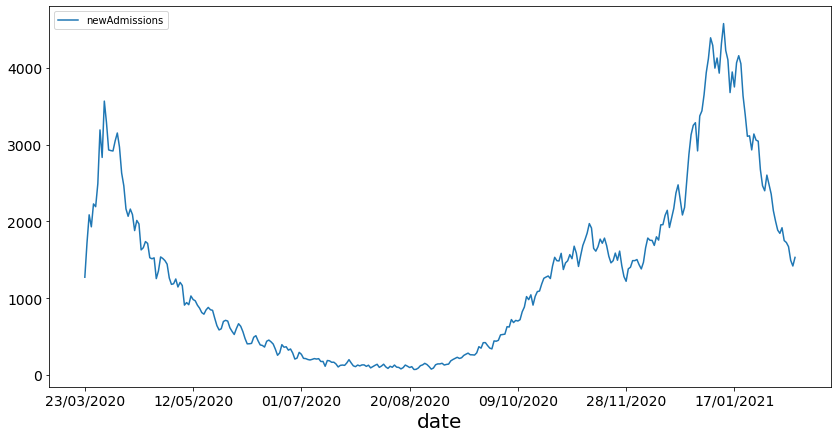

In [4]:
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

df_hosp.plot(x='date', y='newAdmissions')
plt.show()

Note the sharp increase in hospital admissions from late Novemeber to early January (the rise of the 'new variant'). We now extract the rows spanning the dates  28 November to 10 January into a data frame called `df_part`

In [5]:
df_part = df_hosp[250:294]
df_part.head(2)

,date,newAdmissions,cumulativeAdmissions
250,28/11/2020,1220,220585
251,29/11/2020,1382,221967


In [6]:
df_part.tail(2)

,date,newAdmissions,cumulativeAdmissions
292,09/01/2021,4126,323260
293,10/01/2021,3929,327189


We now convert the `newAdmissions` column to a numpy array `yvals`

In [7]:
yvals = np.array(df_part['newAdmissions'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

## 2a) Plot the data `yvals` vs `xvals` in a scatterplot

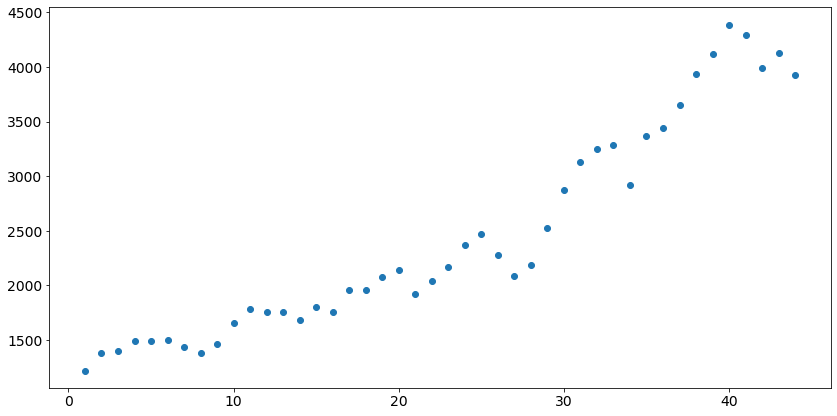

In [8]:
# Your code for scatterplot here
plt.scatter(xvals, yvals)

## 2b) Fit an exponential model to the data 

From our knowledge of how the virus spreads, we know that the number of infections, hospital admissions etc. should (roughly) follow an exponential curve. We would therefore like to fit a model of the form $y = c_1 e^{c_2 x}$, where $y$ is the number of admissions on day $x$. 

Note that this is a linear model on a log-scale for $y$. That is, $\log y = \log c_1 +  c_2 x$.

- Fit a linear model for $\log(\text{yvals})$ vs $\text{xvals}$, and print the values of $c_1$ and $c_2$
- Plot the fit $y = c_1 e^{c_2x}$ along with the scatterplot of the data

c1 is 1193.331778116899 and c2 is 0.028800216919931176


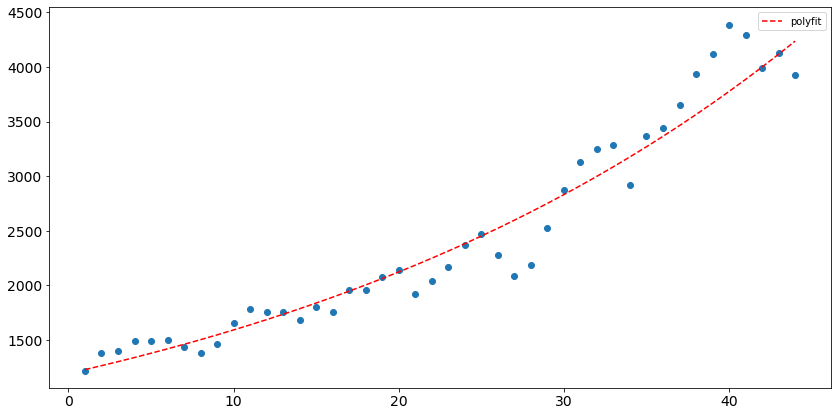

In [21]:
# your code here
fit = np.polyfit(xvals, np.log(yvals), 1)
print(f'c1 is {np.exp(fit[1])} and c2 is {fit[0]}')
p = np.poly1d(fit)
yhat = np.exp(p(xvals))
plt.plot(xvals, yhat, 'r--', label='polyfit')
plt.scatter(xvals, yvals)
plt.legend()

## 2c) Estimate the weekly growth rate in hospital admissions (in \%) over this period

_Hint_ : According to the model, admissions increase every 7 days by a factor of 
$(c_1 e^{c_2 (x+7)})/(c_1 e^{c_2 x}) = e^{7c_2}$.

In [24]:
# compute and print weekly growth rate (in %)
# your code here
# model says that admissions increase every 7 days by a factor of exp(7*c2)
percent_increase = 100*(np.exp(7*fit[0])-1)
print(f'The weekly growth rate is {percent_increase:.2f}%')

The weekly growth rate is 22.34%
